# 1. Linear Regression

As a part of our Machine learning course, this is the first algorithm we would be looking at for a regression problem. As discussed previously, regression is a predictive type of problem where we try to model a continuos target value from a given set of features.

**Linear Regression** is a solution where you try to fit a line (or a hyperplane) to the input data to estimate the target value. Simple as that, and according to our ML types, it is a parametric model.

It is done in two different ways namely:
1. Using gradient descent
2. Using the normal method

More on this will be added later

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import copy

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression as lr


## 1. Data (Representation and preprocessing)

In [3]:
data = load_boston()
data,target,features,desc = data['data'],data['target'],data['feature_names'],data['DESCR']
df = pd.DataFrame(data)
df.columns = features
df['target'] = target
df.head()

data,target = load_boston(return_X_y=True)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
print(desc)

### So, how does our data look? (Visualising just one columns, which is the number of rooms per house)

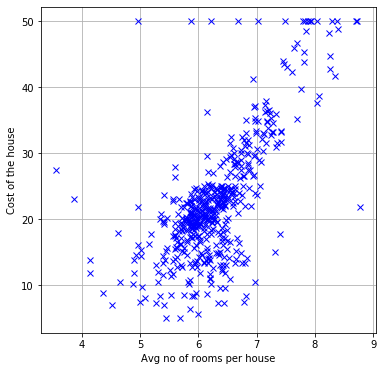

In [7]:
fig = plt.figure(1,figsize=(6,6))
plt.plot(data[:,5],target,'bx')
plt.xlabel('Avg no of rooms per house')
plt.ylabel('Cost of the house')
plt.grid()
plt.show()

### Normalising the data

In [10]:
# normalise the data
scaler = StandardScaler()

# df[df.columns] = scaler.fit_transform(df[df.columns])

data_old = copy(data)
target_old = copy(target)

data = scaler.fit_transform(data)
target = scaler.fit_transform(target.reshape(-1,1))

### So after normalising, how does the same data look?

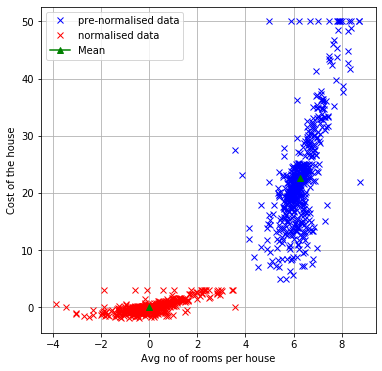

In [13]:
old_data_mean = np.mean(data_old,axis=0)
data_mean = np.mean(data,axis=0)
old_target_mean = np.mean(target_old)
target_mean = np.mean(target)

fig = plt.figure(1,figsize=(6,6))
plt.plot(data_old[:,5],target_old,'bx',label='pre-normalised data')
plt.plot(data[:,5],target,'rx', label='normalised data')
plt.plot(old_data_mean[5],old_target_mean,marker='^',color='green')
plt.plot(data_mean[5],target_mean,marker='^',color='green',label='Mean')
plt.xlabel('Avg no of rooms per house')
plt.ylabel('Cost of the house')
plt.legend()
plt.grid()
plt.show()

### It actually doesn't change in it's shape and trends and etc, just scaled down!

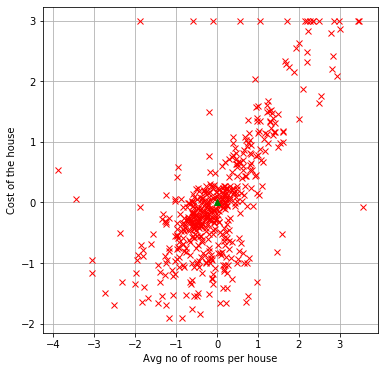

In [14]:
fig = plt.figure(1,figsize=(6,6))
plt.plot(data[:,5],target,'rx')
plt.plot(data_mean[5],target_mean,marker='^',color='green')
plt.xlabel('Avg no of rooms per house')
plt.ylabel('Cost of the house')
plt.grid()
plt.show()

## 2. Task

### So to formally define the task, given different features of housing data, we are to predict what might it's cost  be.

Now that we have defined our problem, we need to first look at an important concept, which is splitting the data into train, validation and test sets.

In [16]:
xtrain,xtest,ytrain,ytest = tts(data,target, test_size=0.2)

In [17]:
xtrain,xval,ytrain,yval = tts(xtrain,ytrain, test_size=0.2)

(323,)

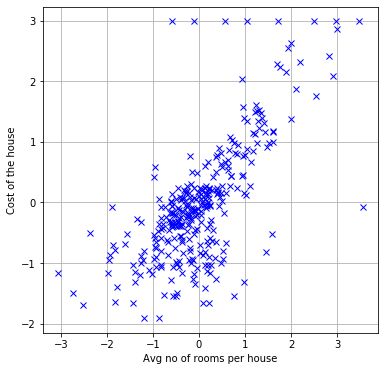

In [26]:
fig = plt.figure(1,figsize=(6,6))
plt.plot(xtrain[:,5],ytrain,'bx')
plt.xlabel('Avg no of rooms per house')
plt.ylabel('Cost of the house')
plt.grid()

xtrain[:,5].shape

## 3. Model

As we all know, we have chosen a linear regression model, we will be implementing it in a couple of ways, along with showing you the way standard ML algorithms are implemented.

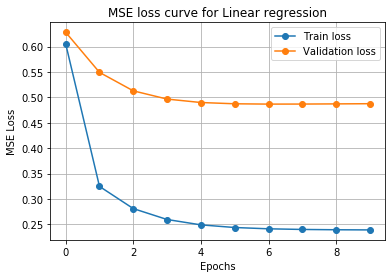

In [40]:
# Method one, to display the processes in ML
def train(xtrain,ytrain,epochs=2,learning_rate=0.001):
    xtrain = xtrain[:,5].reshape(-1,1)
    w = np.random.rand(1).reshape(-1,1)
#     w = np.random.rand(xtrain.shape[1])
    b = np.random.rand(1).reshape(-1,1)
    train_loss_array = []
    val_loss_array = []
    for t in range(epochs):
        y_pred = np.dot(xtrain,w)+b
        total_loss = 0.5*mse(y_pred,ytrain)
        train_loss_array.append(total_loss)
#       update w and b step
        w -= learning_rate*(np.sum((y_pred-ytrain)*xtrain))
        b -= np.mean(y_pred-ytrain)
        val_loss = test(xval,yval,[w,b])[0]
        val_loss_array.append(val_loss)
#     print(loss_array)

    plt.plot(np.arange(0,epochs),train_loss_array,marker='o',label='Train loss')
    plt.plot(np.arange(0,epochs),val_loss_array,marker='o',label='Validation loss')
    plt.xlabel("Epochs")
    plt.ylabel("MSE Loss")
    plt.title("MSE loss curve for Linear regression")
    plt.grid()
    plt.legend()
    plt.show()
    return w,b

def test(xtest,ytest,regressors):
    xtest = xtest[:,5].reshape(-1,1)
    w,b = regressors
    y_pred = np.dot(xtest,w)+b
    test_mse = mse(y_pred,ytest)
    test_rmse = np.sqrt(test_mse)
    test_mae = mae(y_pred,ytest)
    return [test_mse,test_rmse,test_mae]
    
w,b = train(xtrain,ytrain,10)
scores = test(xtest,ytest,[w,b])
# print("On test data:\nMSE \t: {} \nRMSE \t: {} \nMAE \t: {}".format(val_mse,val_rmse,val_mae))

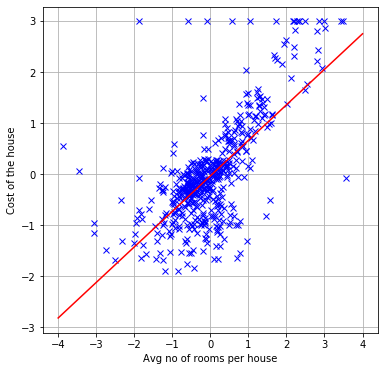

In [41]:
x_axis = np.linspace(-4,4,100)
x_axis = x_axis.reshape(-1,1)
predicted_line = np.dot(x_axis,w)+b
# x_axis

fig = plt.figure(1,figsize=(6,6))
plt.plot(data[:,5],target,'bx')
plt.plot(x_axis,predicted_line,color='red')
plt.xlabel('Avg no of rooms per house')
plt.ylabel('Cost of the house')
plt.grid()
plt.show()

In [28]:
reg = lr(n_jobs=4)
x = xtrain[:,5].reshape(-1,1)
y = ytrain.reshape(-1,1)
reg.fit(x,y)
w,b = reg.coef_,reg.intercept_
# The modeled line is w.T*x + b

In [29]:
r = reg.score(x,y)
print("R squared score for train data is {}".format(r)) #This is the R^2 measure

R squared score for train data is 0.49678780142356826


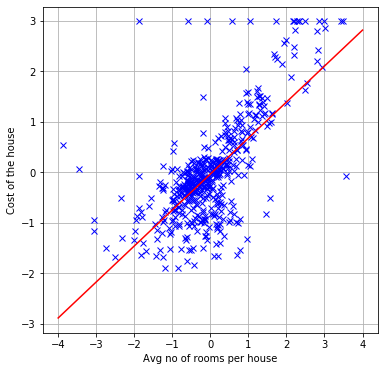

In [31]:
x_axis = np.linspace(-4,4,100)
x_axis = x_axis.reshape(-1,1)
predicted_line = np.dot(x_axis,w)+b
# x_axis

fig = plt.figure(1,figsize=(6,6))
plt.plot(data[:,5],target,'bx')
plt.plot(x_axis,predicted_line,color='red')
plt.xlabel('Avg no of rooms per house')
plt.ylabel('Cost of the house')
plt.grid()
plt.show()

## 4.Evaluation

In [134]:
# Evaluation
yval_pred = reg.predict(xval[:,5].reshape(-1,1))
ytest_pred = reg.predict(xtest[:,5].reshape(-1,1))

In [144]:
# Compute the evaluation metric MSE, RMSE and MAE
val_mse = mse(yval_pred,yval)
val_rmse = np.sqrt(val_mse)
val_mae = mae(yval_pred,yval)
print("Validation MSE \t: {} \nValidation RMSE : {} \nValidation MAE \t: {}".format(val_mse,val_rmse,val_mae))

Validation MSE 	: 29.001626762049835 
Validation RMSE : 5.385315846080881 
Validation MAE 	: 3.9890719468992124


In [145]:
test_mse = mse(ytest_pred,ytest)
test_rmse = np.sqrt(test_mse)
test_mae = mae(ytest_pred,ytest)
print("Test MSE : {} \nTest RMSE : {} \nTest MAE : {}".format(test_mse,test_rmse,test_mae))

Test MSE : 52.45983252527772 
Test RMSE : 7.2429160236245815 
Test MAE : 5.061328178499241


## 5. Optimising

Improving our model means reducing the loss, or the evaluation metrics. There can be different strategies such as changing epochs, learning rate, different normalisation of data etc.

## 6. Problems

1. Implement the min max scaler on the dataset and compare how it differes from standard normal scaling.
2. Implement Linear regression on the whole of boston dataset, plot the predicted model and report the different scores.
3. Do the same on multivariate_normal data
4. How does normalising or not affect our model?
5. Analyse and plot the loss curves for different epochs and learning rates